## Import libraries and dataset

In [1]:
from classes.NN import NN
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset

In [2]:
from keras.datasets import mnist

# Import dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train),784)
X_test = X_test.reshape(len(X_test),784)

def index2onehot(index, size):
    return [(0 if i != index else 1) for i in range(size)]

y_train = list(map(index2onehot, y_train, [10] * len(y_train)))
y_test = list(map(index2onehot, y_test, [10] * len(y_test)))

train_set = TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
test_set = TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).float())

# 1. Logistic Regression

### Instantiate and train the model

In [3]:
model = NN(layer_sizes = [784, 10])
model.train(train_set, criterion = 'cross_entropy', epochs = 5, lr = 0.001)

### Test the model

In [4]:
model.accuracy(test_set)

86.53

# 2. NN for MNIST

### Instantiate and train the model

In [5]:
model2 = NN(layer_sizes = [784, 300, 10], activation_functions = ['sigmoid'])
model2.train(train_set, criterion = 'cross_entropy', epochs = 5, lr = 0.001, regularization='l2')

### Test the model

In [6]:
model2.accuracy(test_set)

89.16

# 3. Input generation from model2

### Gradient descent on the input

In [7]:
# Target value
target_value = 4
y_val = F.one_hot(torch.tensor([target_value]), 10).float()

# Initialize random input
x = 255.0 * torch.rand(1,784)
x_copy = x.clone()
x.requires_grad = True

# Loss
criterion = nn.CrossEntropyLoss()

# Learning
epochs = 10000

# Keep track of losses
losses = []

for _ in range(epochs):

    # Optimizer for SGF
    optimizer = optim.SGD([x], lr = 0.01)

    # Calculate loss
    y_pred = model2.model(x)
    loss = criterion(y_pred, y_val)
    loss.backward()
    losses.append(loss.detach().float())

    # Step
    optimizer.step()
    optimizer.zero_grad()

### So what does our final number look like?

Loss: tensor(3.8609)


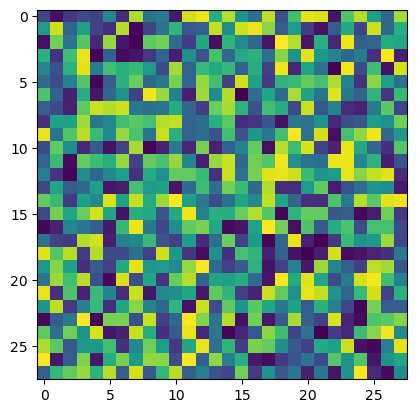

In [9]:
import matplotlib.pyplot as plt

print('Loss:', losses[-1])
plt.imshow(x.detach().numpy().reshape(28,28))
plt.show()

### Yeah... not so good
### To end, let's plot the losses

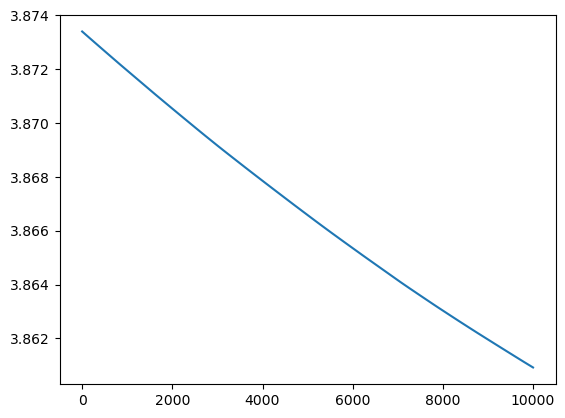

In [10]:
plt.plot(losses)
plt.show()